In [21]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt

print(tf.__version__)

2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


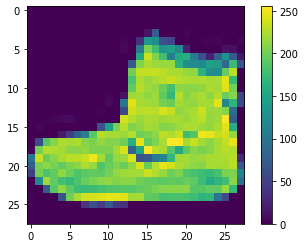

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

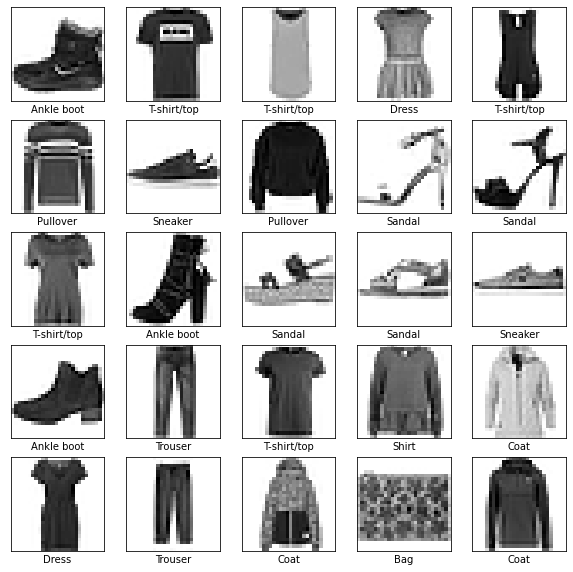

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.4986 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.3785 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 1s 618us/step - loss: 0.3386 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 1s 618us/step - loss: 0.3137 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 1s 672us/step - loss: 0.2950 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.2813 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 1s 642us/step - loss: 0.2676 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.2572 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 1s 640us/step - loss: 0.2488 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 1s 654u

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3384 - accuracy: 0.8829 - 226ms/epoch - 722us/step

Test accuracy: 0.8828999996185303


In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]

array([1.4285298e-07, 3.6626310e-11, 4.9156205e-07, 3.0448415e-08,
       1.3281513e-07, 2.4065168e-03, 4.5529332e-06, 3.4594342e-02,
       3.4601953e-08, 9.6299380e-01], dtype=float32)

In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

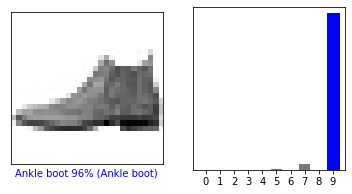

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

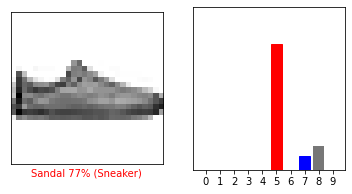

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

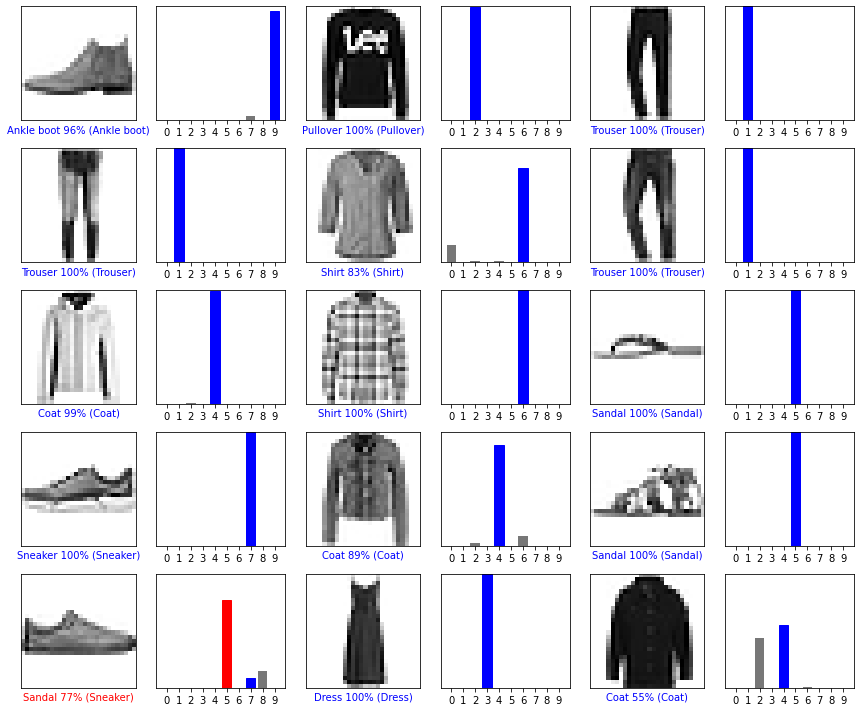

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [16]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [17]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [18]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1705342e-05 4.4325208e-12 9.9776995e-01 9.4118376e-13 1.8721473e-03
  1.8791726e-08 3.3622267e-04 2.6270508e-14 1.1592967e-10 1.6637185e-15]]


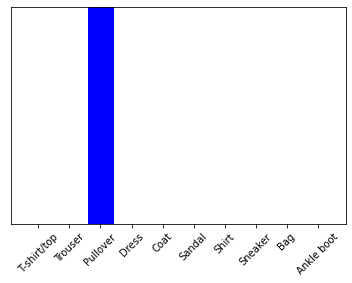

In [19]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [20]:
np.argmax(predictions_single[0])

2

In [88]:
# Hidden_units = tuple(np.arange(1,101,1, dtype= np.int))
### Make it 2**n
Hidden_units = tuple(np.array([2**i for i in range(1, 13)]))

domain = [{'name': 'Hidden_units', 'type': 'discrete', 'domain':Hidden_units}]

print(Hidden_units)

(2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096)


In [89]:
def objective_function(x): 
    
    print(x[0][0])
    
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(x[0][0], activation='relu'),
    tf.keras.layers.Dense(10)
    ])
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=10)

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('\nTest accuracy:', test_acc)
    return test_loss

In [90]:
opt = GPyOpt.methods.BayesianOptimization(f = objective_function,   # function to optimize
                                              domain = domain,         # box-constrains of the problem
                                              acquisition_type = 'EI' ,      # Select acquisition function MPI, EI, LCB
                                             )



2.0
Epoch 1/10
1875/1875 [==============================] - 1s 546us/step - loss: 1.8995 - accuracy: 0.2227
Epoch 2/10
1875/1875 [==============================] - 1s 541us/step - loss: 1.6162 - accuracy: 0.3295
Epoch 3/10
1875/1875 [==============================] - 1s 551us/step - loss: 1.5006 - accuracy: 0.3692
Epoch 4/10
1875/1875 [==============================] - 1s 541us/step - loss: 1.4416 - accuracy: 0.3863
Epoch 5/10
1875/1875 [==============================] - 1s 542us/step - loss: 1.4056 - accuracy: 0.3997
Epoch 6/10
1875/1875 [==============================] - 1s 544us/step - loss: 1.3811 - accuracy: 0.4103
Epoch 7/10
1875/1875 [==============================] - 1s 541us/step - loss: 1.3628 - accuracy: 0.4171
Epoch 8/10
1875/1875 [==============================] - 1s 549us/step - loss: 1.3481 - accuracy: 0.4236
Epoch 9/10
1875/1875 [==============================] - 1s 544us/step - loss: 1.3356 - accuracy: 0.4272
Epoch 10/10
1875/1875 [==============================] - 1s 

In [91]:
opt.acquisition.exploration_weight=0.5

opt.run_optimization(max_iter = 15) 


16
Epoch 1/10
1875/1875 [==============================] - 1s 591us/step - loss: 0.5985 - accuracy: 0.7967
Epoch 2/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.4355 - accuracy: 0.8476
Epoch 3/10
1875/1875 [==============================] - 1s 603us/step - loss: 0.4080 - accuracy: 0.8560
Epoch 4/10
1875/1875 [==============================] - 1s 595us/step - loss: 0.3927 - accuracy: 0.8611
Epoch 5/10
1875/1875 [==============================] - 1s 589us/step - loss: 0.3800 - accuracy: 0.8637
Epoch 6/10
1875/1875 [==============================] - 1s 590us/step - loss: 0.3710 - accuracy: 0.8665
Epoch 7/10
1875/1875 [==============================] - 1s 598us/step - loss: 0.3663 - accuracy: 0.8699
Epoch 8/10
1875/1875 [==============================] - 1s 599us/step - loss: 0.3574 - accuracy: 0.8715
Epoch 9/10
1875/1875 [==============================] - 1s 578us/step - loss: 0.3540 - accuracy: 0.8735
Epoch 10/10
1875/1875 [==============================] - 1s 5

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3570 - accuracy: 0.8695
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2985 - accuracy: 0.8896
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2811 - accuracy: 0.8966
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2632 - accuracy: 0.9025
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9040
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2402 - accuracy: 0.9097
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2311 - accuracy: 0.9140
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2217 - accuracy: 0.9163
313/313 - 0s - loss: 0.3295 - accuracy: 0.8897 - 225ms/epoch - 719us/step

Test accuracy: 0.

In [92]:
x_best = opt.X[np.argmin(opt.Y)]

print(x_best)

[512.]
